<ipython-input-7-a1c5cd0b6000>:54: RuntimeWarning: invalid value encountered in multiply
  gradient = (-2/len(x_train)) * np.dot(X_train_poly.T, (y_train - y_pred)) + 2 * lmbda * a
<ipython-input-7-a1c5cd0b6000>:57: RuntimeWarning: invalid value encountered in subtract
  a -= learning_rate * gradient


Best lambda: None, Test MSE: inf


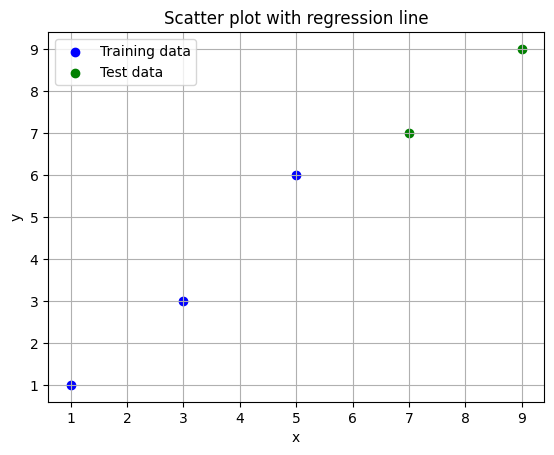

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate polynomial features
def polynomial_features(x, degree):
    """
    Generates polynomial features up to the specified degree for the input array x.

    Parameters:
    x (numpy array): Input array.
    degree (int): Degree of the polynomial features.

    Returns:
    numpy array: Polynomial features matrix with columns [1, x, x^2, ..., x^degree].
    """
    features = np.ones((len(x), 1))
    for i in range(1, degree + 1):
        features = np.concatenate((features, np.power(x, i).reshape(-1, 1)), axis=1)
    return features

# Given data points
x_train = np.array([1, 3, 5])
y_train = np.array([1, 3, 6])
x_test = np.array([7, 9])
y_test = np.array([7, 9])

# Learning rate
learning_rate = 0.01
# Initial guess for the parameters
a = np.zeros(3)  # Coefficients for the linear term and the constant term
# Number of iterations
num_iterations = 1000
# Polynomial degree
degree = 2

# Regularization parameter lambda values to try
lambda_values = [0.0, 0.01, 0.1, 1.0, 10.0]

best_lambda = None
best_mse = float('inf')
best_a = None

# Gradient descent with Ridge regularization
for lmbda in lambda_values:
    a = np.zeros(degree + 1)
    for i in range(num_iterations):
        # Generate polynomial features for training data
        X_train_poly = polynomial_features(x_train, degree)

        # Predicted values using current parameters
        y_pred = np.dot(X_train_poly, a)

        # Compute gradients with Ridge regularization
        gradient = (-2/len(x_train)) * np.dot(X_train_poly.T, (y_train - y_pred)) + 2 * lmbda * a

        # Update parameters using gradients
        a -= learning_rate * gradient

    # Generate polynomial features for test data
    X_test_poly = polynomial_features(x_test, degree)
    # Compute MSE on test data
    y_pred_test = np.dot(X_test_poly, a)
    mse_test = np.mean((y_test - y_pred_test) ** 2)

    # Check if this lambda gives better MSE
    if mse_test < best_mse:
        best_mse = mse_test
        best_lambda = lmbda
        best_a = a

print(f"Best lambda: {best_lambda}, Test MSE: {best_mse}")

# Plot the scatter plot and regression line
plt.scatter(x_train, y_train, label='Training data', color='blue')
plt.scatter(x_test, y_test, label='Test data', color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot with regression line')

# Plot the regression line with optimal lambda
if best_a is not None:
    x_range = np.linspace(min(x_train.min(), x_test.min()), max(x_train.max(), x_test.max()), 100)
    X_range_poly = polynomial_features(x_range, degree)
    # Compute the predicted values for the range of x values
    y_range = np.sum(X_range_poly * best_a, axis=1)
    plt.plot(x_range, y_range, color='red', linewidth=2, label=f'Regression line (lambda={best_lambda})')

plt.legend()
plt.grid(True)
plt.show()

Best lambda: 0.1, Test MSE: 3.1489316033260186, Best a:[ 0.28994398  0.29238822  0.261926   -0.01843525]


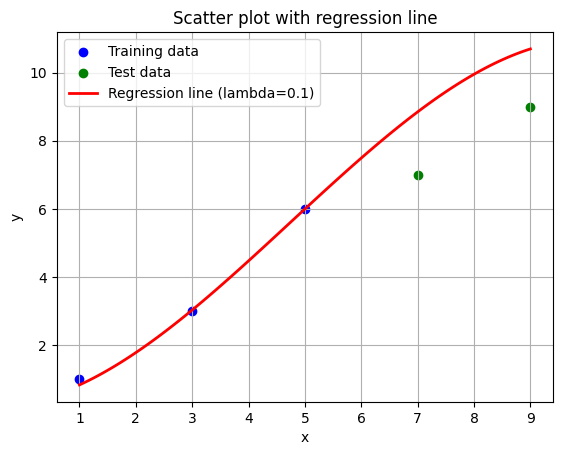

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate polynomial features
def polynomial_features(x, degree):
    """
    Generates polynomial features up to the specified degree for the input array x.

    Parameters:
    x (numpy array): Input array.
    degree (int): Degree of the polynomial features.

    Returns:
    numpy array: Polynomial features matrix with columns [1, x, x^2, ..., x^degree].
    """
    features = np.ones((len(x), 1))
    for i in range(1, degree + 1):
        features = np.concatenate((features, np.power(x, i).reshape(-1, 1)), axis=1)
    return features

# Given data points
x_train = np.array([1, 3, 5])
y_train = np.array([1, 3, 6])
x_test = np.array([7, 9])
y_test = np.array([7, 9])

# Learning rate
learning_rate = 0.0001
# Initial guess for the parameters
a = np.zeros(3)  # Coefficients for the linear term and the constant term
# Number of iterations
num_iterations = 20000
# Polynomial degree
degree = 3

# Regularization parameter lambda values to try
lambda_values = [0.0, 0.001, 0.01, 0.1, 1.0, 10.0]

best_lambda = None
best_mse = float('inf')
best_a = None

# Gradient descent with Ridge regularization
for lmbda in lambda_values:
    a = np.zeros(degree + 1)
    for i in range(num_iterations):
        # Generate polynomial features for training data
        X_train_poly = polynomial_features(x_train, degree)

        # Predicted values using current parameters
        y_pred = np.dot(X_train_poly, a)

        # Compute gradients with Ridge regularization
        gradient = (-2/len(x_train)) * np.dot(X_train_poly.T, (y_train - y_pred)) + 2 * lmbda * a

        # Update parameters using gradients
        a -= learning_rate * gradient

    # Generate polynomial features for test data
    X_test_poly = polynomial_features(x_test, degree)
    # Compute MSE on test data
    y_pred_test = np.dot(X_test_poly, a)
    mse_test = np.mean((y_test - y_pred_test) ** 2)

    # Check if this lambda gives better MSE
    if mse_test < best_mse:
        best_mse = mse_test
        best_lambda = lmbda
        best_a = a

print(f"Best lambda: {best_lambda}, Test MSE: {best_mse}, Best a:{best_a}")

# Plot the scatter plot and regression line
plt.scatter(x_train, y_train, label='Training data', color='blue')
plt.scatter(x_test, y_test, label='Test data', color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot with regression line')

# Plot the regression line with optimal lambda
if best_a is not None:
    x_range = np.linspace(min(x_train.min(), x_test.min()), max(x_train.max(), x_test.max()), 100)
    X_range_poly = polynomial_features(x_range, degree)
    # Compute the predicted values for the range of x values
    y_range = np.dot(X_range_poly, best_a)
    plt.plot(x_range, y_range, color='red', linewidth=2, label=f'Regression line (lambda={best_lambda})')

plt.legend()
plt.grid(True)
plt.show()


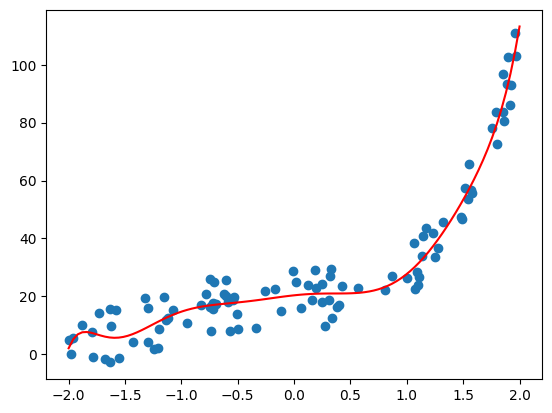

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


X = 4 * np.random.rand(100, 1) -2
y = 4 + 2 * X + 5 + X**2 + 6 * X**3 + 2 * X**4 + 20*np.random.rand(100, 1)

poly_feats = PolynomialFeatures(degree = 10, include_bias = False)
X_poly = poly_feats.fit_transform(X)

reg=LinearRegression()
reg.fit(X_poly, y)

X_vals = np.linspace(-2, 2, 100).reshape(-1, 1)
X_vals_poly = poly_feats.transform(X_vals)
y_vals = reg.predict(X_vals_poly)

plt.scatter(X, y)
plt.plot(X_vals, y_vals, color="r")
plt.show()

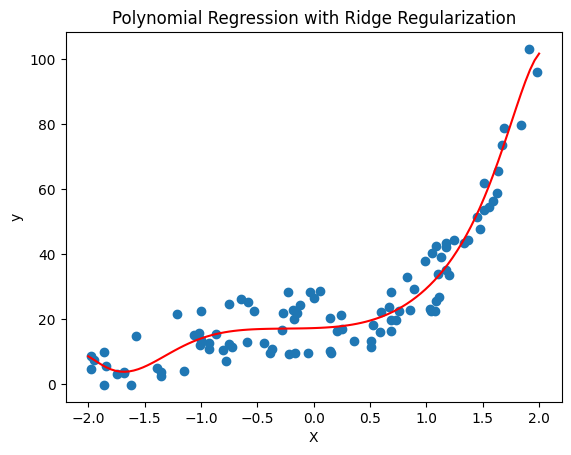

Best lambda: 1.0
Minimum Test MSE: 35.47952748252107


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Generate random data
X = 4 * np.random.rand(100, 1) - 2
y = 4 + 2 * X + 5 + X**2 + 6 * X**3 + 2 * X**4 + 20*np.random.rand(100, 1)

# Define polynomial features degree
degree = 10

# Generate polynomial features manually
X_poly = np.ones((X.shape[0], 1))
for i in range(1, degree + 1):
    X_poly = np.concatenate((X_poly, X ** i), axis=1)

# Split the data into training and testing sets
X_train, X_test = X_poly[:80], X_poly[80:]
y_train, y_test = y[:80], y[80:]

# Ridge regression with different lambda values
lambda_values = [0.0, 0.001, 0.01, 0.1, 1.0, 10.0]
best_lambda = None
best_mse = float('inf')
best_model = None

for lmbda in lambda_values:
    # Compute ridge regression coefficients
    A = np.dot(X_train.T, X_train) + lmbda * np.eye(degree + 1)
    theta = np.linalg.inv(A).dot(X_train.T).dot(y_train)

    # Compute predictions on test set
    y_pred = np.dot(X_test, theta)

    # Compute MSE
    mse = mean_squared_error(y_test, y_pred)

    # Check if this lambda gives better MSE
    if mse < best_mse:
        best_mse = mse
        best_lambda = lmbda
        best_model = theta

# Generate polynomial features for plotting
X_vals = np.linspace(-2, 2, 100).reshape(-1, 1)
X_vals_poly = np.ones((X_vals.shape[0], 1))
for i in range(1, degree + 1):
    X_vals_poly = np.concatenate((X_vals_poly, X_vals ** i), axis=1)

# Compute predictions for plotting
y_vals = np.dot(X_vals_poly, best_model)

# Plot the data and regression line
plt.scatter(X, y)
plt.plot(X_vals, y_vals, color="r")
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression with Ridge Regularization')
plt.show()

# Print results
print(f"Best lambda: {best_lambda}")
print(f"Minimum Test MSE: {best_mse}")


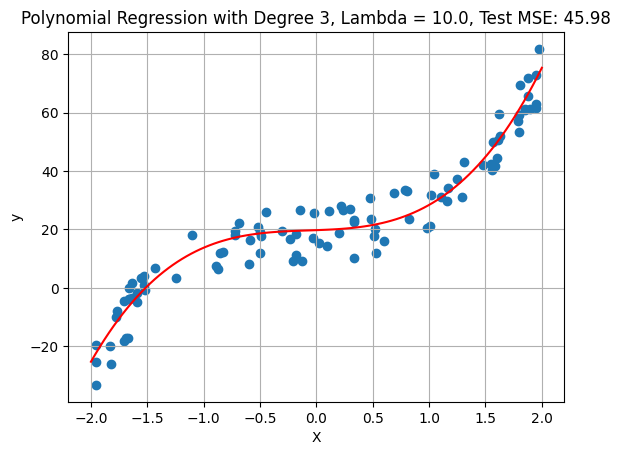

Best lambda: 10.0, Test MSE: 45.98


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Generate random data
X = 4 * np.random.rand(100, 1) - 2
y = 4 + 2 * X + 5 + X**2 + 6 * X**3 + 20 * np.random.rand(100, 1)

# Split the data into training and testing sets
X_train, X_test = X[:80], X[80:]
y_train, y_test = y[:80], y[80:]

# Define polynomial degree and regularization parameter
degree = 3
alpha_values = [0.0, 0.01, 0.1, 1.0, 10.0]
best_alpha = None
best_mse = float('inf')
best_model = None

for alpha in alpha_values:
    # Create polynomial features
    poly_feats = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly_feats.fit_transform(X_train)
    X_test_poly = poly_feats.transform(X_test)

    # Fit Ridge regression model
    reg = Ridge(alpha=alpha)
    reg.fit(X_train_poly, y_train)

    # Predict on test set
    y_pred = reg.predict(X_test_poly)

    # Compute MSE
    mse = mean_squared_error(y_test, y_pred)

    # Update best parameters if MSE is lower
    if mse < best_mse:
        best_mse = mse
        best_alpha = alpha
        best_model = reg

# Plot the scatter plot and regression line
X_vals = np.linspace(-2, 2, 100).reshape(-1, 1)
X_vals_poly = poly_feats.transform(X_vals)
y_vals = best_model.predict(X_vals_poly)

plt.scatter(X, y)
plt.plot(X_vals, y_vals, color="r")
plt.title(f"Polynomial Regression with Degree {degree}, Lambda = {best_alpha}, Test MSE: {best_mse:.2f}")
plt.xlabel('X')
plt.ylabel('y')
plt.grid(True)
plt.show()

print(f"Best lambda: {best_alpha}, Test MSE: {best_mse:.2f}")


Best lambda: 0.0, Test MSE: 32.17


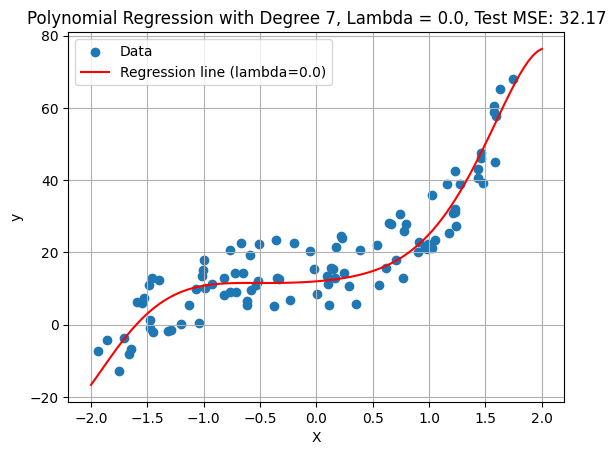

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data
X = 4 * np.random.rand(100, 1) - 2
y = 4 + 2*X + 5*X**2 + 6*X**3 + 20 * np.random.rand(100, 1)

# Split the data into training and testing sets
X_train, X_test = X[:80], X[80:]
y_train, y_test = y[:80], y[80:]

# Define polynomial degree and regularization parameter
degree = 7
alpha_values = [0.0, 0.01, 0.1, 1.0, 10.0]
learning_rate = 0.001
num_iterations = 2000

best_alpha = None
best_mse = float('inf')
best_a = None

# Define polynomial features function
def polynomial_features(X, degree):
    m, n = X.shape
    X_poly = np.ones((m, 1))
    for d in range(1, degree + 1):
        X_poly = np.hstack((X_poly, np.power(X, d)))
    return X_poly

# Gradient descent with Ridge regularization
for alpha in alpha_values:
    # Initialize parameters
    a = np.zeros((degree + 1, 1))

    # Create polynomial features
    X_train_poly = polynomial_features(X_train, degree)
    X_test_poly = polynomial_features(X_test, degree)

    for _ in range(num_iterations):
        # Compute predicted values
        y_pred_train = np.dot(X_train_poly, a)

        # Compute gradients with Ridge regularization
        gradient = (-2/len(X_train)) * (X_train_poly.T.dot(y_train - y_pred_train)) + 2 * alpha * a

        # Update parameters using gradients
        a -= learning_rate * gradient

    # Compute MSE on test data
    y_pred_test = np.dot(X_test_poly, a)
    mse = np.mean((y_test - y_pred_test) ** 2)

    # Check if this alpha gives better MSE
    if mse < best_mse:
        best_mse = mse
        best_alpha = alpha
        best_a = a

# Print the best lambda value and test MSE
print(f"Best lambda: {best_alpha}, Test MSE: {best_mse:.2f}")

# Plot the scatter plot and regression line
plt.scatter(X, y, label='Data')
plt.xlabel('X')
plt.ylabel('y')

# Generate X values for plotting the regression line
X_range = np.linspace(-2, 2, 100).reshape(-1, 1)
X_range_poly = polynomial_features(X_range, degree)

if best_a is not None:  # Check if best_a is valid
    y_range = np.dot(X_range_poly, best_a)
    # Plot the regression line
    plt.plot(X_range, y_range, color='red', label=f'Regression line (lambda={best_alpha})')
else:
    print("Error: best_a is None")

plt.title(f"Polynomial Regression with Degree {degree}, Lambda = {best_alpha}, Test MSE: {best_mse:.2f}")
plt.legend()
plt.grid(True)
plt.show()


Best lambda: 0.0, Test MSE: 91.99


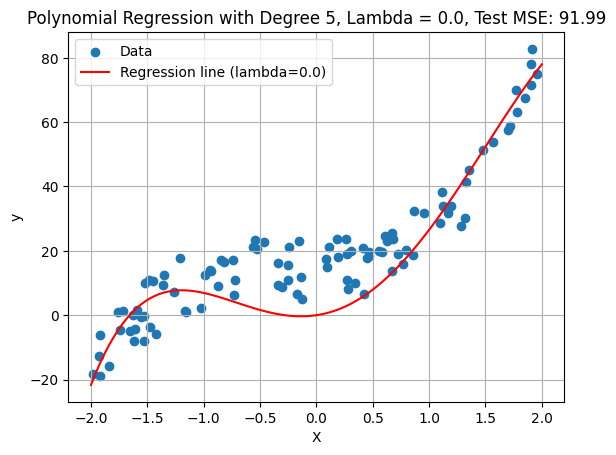

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

# Generate random data
np.random.seed(0)
X = 4 * np.random.rand(100, 1) - 2
y = 4 + 2*X + 5*X**2 + 6*X**3 + 20 * np.random.rand(100, 1)

# Split the data into training and testing sets
X_train, X_test = X[:80], X[80:]
y_train, y_test = y[:80], y[80:]

# Define polynomial degree and regularization parameter
degree = 5
alpha_values = [0.0, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
learning_rate = 0.001
num_iterations = 5000

best_alpha = None
best_mse = float('inf')
best_a = None

# Gradient descent with Ridge regularization
for alpha in alpha_values:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Initialize parameters
    a = np.zeros((X_train_poly.shape[1], 1))

    for _ in range(num_iterations):
        # Compute predicted values
        y_pred_train = X_train_poly.dot(a)

        # Compute gradients with Ridge regularization
        gradient = (-2/len(X_train)) * (X_train_poly.T.dot(y_train - y_pred_train)) + 2 * alpha * a

        # Update parameters using gradients
        a -= learning_rate * gradient

    # Compute MSE on test data
    y_pred_test = X_test_poly.dot(a)
    mse = np.mean((y_test - y_pred_test) ** 2)

    # Check if this alpha gives better MSE
    if mse < best_mse:
        best_mse = mse
        best_alpha = alpha
        best_a = a

# Print the best lambda value and test MSE
print(f"Best lambda: {best_alpha}, Test MSE: {best_mse:.2f}")

# Plot the scatter plot and regression line
plt.scatter(X, y, label='Data')
plt.xlabel('X')
plt.ylabel('y')

# Generate X values for plotting the regression line
X_range = np.linspace(-2, 2, 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)

if best_a is not None:  # Check if best_a is valid
    y_range = X_range_poly.dot(best_a)
    # Plot the regression line
    plt.plot(X_range, y_range, color='red', label=f'Regression line (lambda={best_alpha})')
else:
    print("Error: best_a is None")

plt.title(f"Polynomial Regression with Degree {degree}, Lambda = {best_alpha}, Test MSE: {best_mse:.2f}")
plt.legend()
plt.grid(True)
plt.show()


Best lambda: 0.0, Test MSE: 101.75


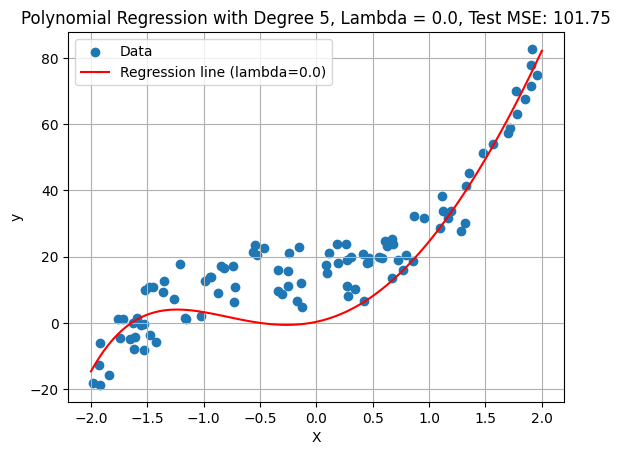

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

# Generate random data
np.random.seed(0)
X = 4 * np.random.rand(100, 1) - 2
y = 4 + 2*X + 5*X**2 + 6*X**3 + 20 * np.random.rand(100, 1)

# Split the data into training and testing sets
X_train, X_test = X[:80], X[80:]
y_train, y_test = y[:80], y[80:]

# Define polynomial degree and regularization parameter
degree = 5
alpha_values = [0.0, 0.01, 0.1, 1.0, 10.0]
learning_rate = 0.001
num_iterations = 5000

best_alpha = None
best_mse = float('inf')
best_a = None

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Gradient descent with Ridge regularization
for alpha in alpha_values:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)

    # Initialize parameters
    a = np.zeros((X_train_poly.shape[1], 1))

    for _ in range(num_iterations):
        # Compute predicted values
        y_pred_train = X_train_poly.dot(a)

        # Compute gradients with Ridge regularization
        gradient = (-2/len(X_train_poly)) * (X_train_poly.T.dot(y_train - y_pred_train)) + 2 * alpha * a

        # Update parameters using gradients
        a -= learning_rate * gradient

    # Compute MSE on test data
    y_pred_test = X_test_poly.dot(a)
    mse = np.mean((y_test - y_pred_test) ** 2)

    # Check if this alpha gives better MSE
    if mse < best_mse:
        best_mse = mse
        best_alpha = alpha
        best_a = a

# Print the best lambda value and test MSE
print(f"Best lambda: {best_alpha}, Test MSE: {best_mse:.2f}")

# Plot the scatter plot and regression line
plt.scatter(X, y, label='Data')
plt.xlabel('X')
plt.ylabel('y')

# Generate X values for plotting the regression line
X_range = np.linspace(-2, 2, 100).reshape(-1, 1)
X_range_scaled = scaler.transform(X_range)
X_range_poly = poly.transform(X_range_scaled)

if best_a is not None:  # Check if best_a is valid
    y_range = X_range_poly.dot(best_a)
    # Plot the regression line
    plt.plot(X_range, y_range, color='red', label=f'Regression line (lambda={best_alpha})')
else:
    print("Error: best_a is None")

plt.title(f"Polynomial Regression with Degree {degree}, Lambda = {best_alpha}, Test MSE: {best_mse:.2f}")
plt.legend()
plt.grid(True)
plt.show()
